In [2]:
!pip install doubletdetection

     |████████████████████████████████| 10.3MB 4.4MB/s 
     |████████████████████████████████| 2.2MB 41.7MB/s 
     |████████████████████████████████| 133kB 50.7MB/s 
     |████████████████████████████████| 1.4MB 24.2MB/s 
     |████████████████████████████████| 163kB 48.6MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
     |████████████████████████████████| 3.2MB 44.5MB/s 
     |████████████████████████████████| 71kB 5.6MB/s 
     |████████████████████████████████| 1.2MB 34.1MB/s 
  Created wheel for sinfo: filename=sinfo-0.3.1-cp37-none-any.whl size=7012 sha256=33e8dcc20f0b381f74ddcf060b1d0fbbf2c3e812a7844bc0a0cdfbcec30ba91b
  Stored in directory: /root/.cache/pip/wheels/11/f0/23/347d6d8e59787c2bc272162d18223dc3b45bd6dc40aceee6af
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=790d1c37069ff04ecf71ef2f94bdc58eb03f985542d5d80af0daf1e45dccfae7
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af95

In [3]:
import doubletdetection

import numpy as np
import doubletdetection
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
%matplotlib inline
sc.settings.n_jobs=8
sc.set_figure_params()

In [4]:
clf = doubletdetection.BoostClassifier()

In [5]:
adata = sc.read_10x_h5(
    "pbmc_10k_v3_filtered_feature_bc_matrix.h5", 
    backup_url="https://cf.10xgenomics.com/samples/cell-exp/3.0.0/pbmc_10k_v3/pbmc_10k_v3_filtered_feature_bc_matrix.h5"
)
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [6]:
sc.pp.filter_genes(adata, min_cells=1)

In [9]:
clf = doubletdetection.BoostClassifier(
    n_iters=5, 
    use_phenograph=False, 
    standard_scaling=True
)
doublets = clf.fit(adata.X).predict(p_thresh=1e-16, voter_thresh=0.5)
doublet_score = clf.doublet_score()

In [10]:
adata.obs["doublet"] = doublets
adata.obs["doublet_score"] = doublet_score

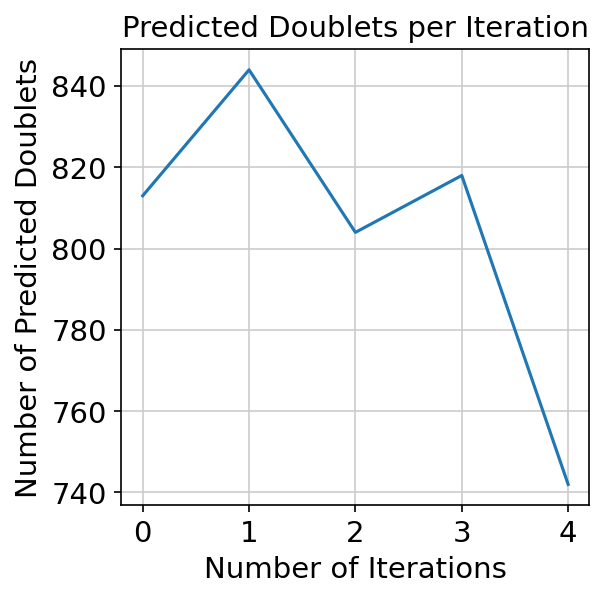

In [26]:
doubletdetection.plot.convergence(clf, save='convergence_test.pdf', show=True, p_thresh=1e-16, voter_thresh=0.5)

In [27]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

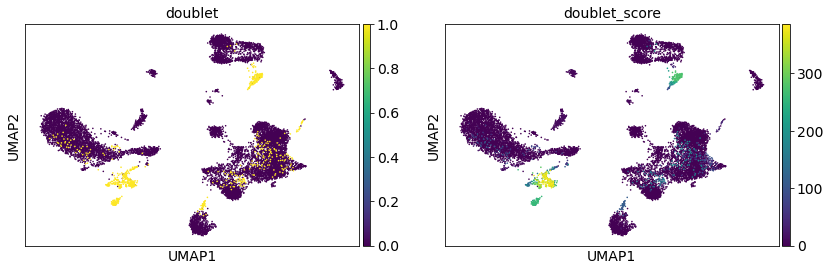

In [39]:
sc.pl.umap(adata, color=["doublet", "doublet_score"])

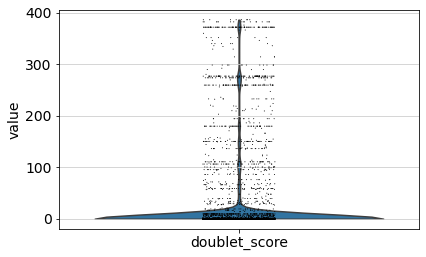

In [38]:
sc.pl.violin(adata, "doublet_score")

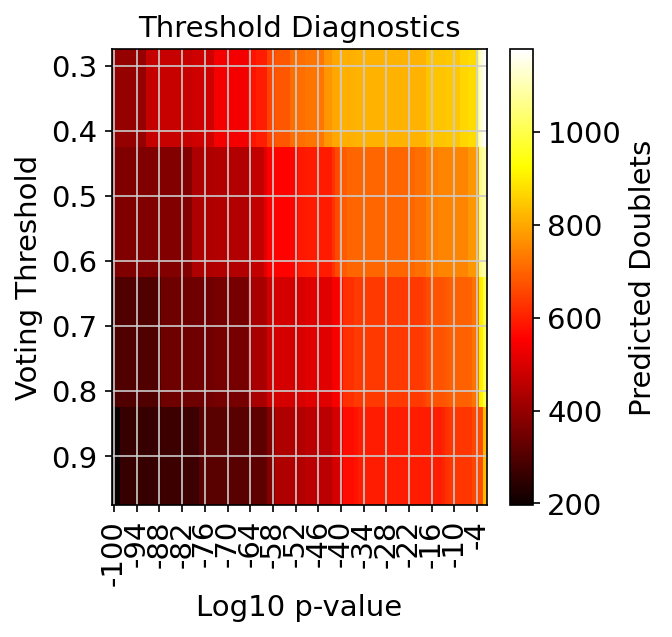

In [30]:
doubletdetection.plot.threshold(clf, save='threshold_test.pdf', show=True, p_step=6)